# Lab 3 - Generalized Linear Regression

## Import and Prepare the Data

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import pandas
import numpy as np

df = pandas.read_excel('house_price.xlsx')

X = np.column_stack((df.lot_size, df.area, df.bedroom, df.bathroom))
y = df.price
print(X[:10])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)


[[ 10018   1541      3      2]
 [  8712   1810      4      2]
 [ 13504   1456      3      2]
 [ 10130   2903      5      4]
 [ 18295   2616      3      2]
 [204732   3850      3      2]
 [  9147   1000      3      1]
 [  2300    920      2      2]
 [ 13939   2705      3      3]
 [  2291   1440      4      3]]


# Ordinary Least Squares

In [4]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'. format(lr.intercept_))
print('Training R Square: {:.2f}'.format(lr.score(X_train, y_train)))
print('Test R Square: {:.2f}'.format(lr.score(X_test, y_test)))


lr.coef_: [  2.12812203e-01   4.09817896e+01   1.34769478e+04   4.47428552e+04]
lr.intercept_: 16022.12534700043
Training R Square: 0.96
Test R Square: 0.71


# Ridge Regression

In [5]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training R Square: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test R Square: {:.2f}".format(ridge.score(X_test, y_test)))

Training R Square: 0.96
Test R Square: 0.72


In [6]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training R Square: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test R Square: {:.2f}".format(ridge10.score(X_test, y_test)))

Training R Square: 0.95
Test R Square: 0.75


In [7]:
ridge1000 = Ridge(alpha=1000).fit(X_train, y_train)
print("Training R Square: {:.2f}".format(ridge1000.score(X_train, y_train)))
print("Test R Square: {:.2f}".format(ridge1000.score(X_test, y_test)))

Training R Square: 0.93
Test R Square: 0.79


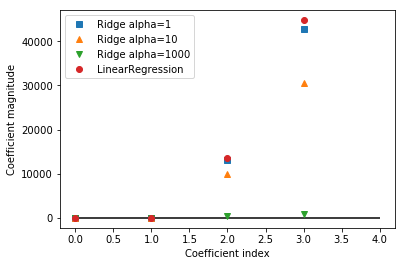

In [9]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label = "Ridge alpha=10")
plt.plot(ridge1000.coef_, 'v', label = "Ridge alpha=1000")
plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.legend()

# Lasso Regression

In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ !=0)))

Training set score: 0.96
Test set score: 0.71
Number of features used: 4


In [12]:
lasso10 = Lasso(alpha=10).fit(X_train, y_train) #set different alpha
print("Training R Square: {:.2f}".format(lasso10.score(X_train, y_train)))
print("Test R Square: {:.2f}".format(lasso10.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso10.coef_ != 0)))

Training R Square: 0.96
Test R Square: 0.71
Number of features used: 4


In [13]:
lasso10000 = Lasso(alpha=10000, ).fit(X_train, y_train)
print("Training R Square: {:.2f}".format(lasso10000.score(X_train, y_train)))
print("Test R Square: {:.2f}".format(lasso10000.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso10000.coef_ != 0)))

Training R Square: 0.95
Test R Square: 0.73
Number of features used: 3


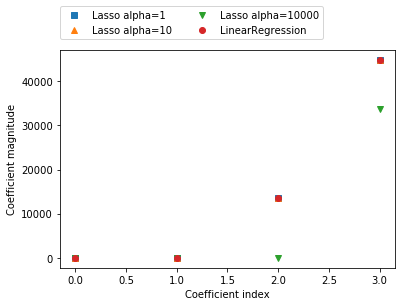

In [14]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso10.coef_, '^', label="Lasso alpha=10")
plt.plot(lasso10000.coef_, 'v', label="Lasso alpha=10000")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")